#Profile Data Diri
- Nama: Muhammad Sayidul Ikhsan Ulya
- Email: xazkiel@gmail.com
- Domisili: Surabaya

[Profil Dicoding saya](https://www.dicoding.com/users/revolver22/academies)

Salam kenal 👐 💖

In [ ]:
import os
dir_exist = os.path.exists('rockpaperscissors')
if not dir_exist:
  !wget https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip
  !unzip rockpaperscissors.zip

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

In [ ]:
root_dir = 'rockpaperscissors/'
rps_dir = os.path.join(root_dir,'rps-cv-images/')

train_dir = rps_dir
test_dir = rps_dir

In [ ]:
training_from_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    height_shift_range=2,
    horizontal_flip=True,
    shear_range=.2,
    fill_mode = 'nearest',
    validation_split=.4,
)
validation_from_gen = ImageDataGenerator(
    rescale =1./255,
    validation_split=.4
)

In [ ]:
PIXEL = 64
FULLCON_NEURON1 = 64
FULLCON_NEURON2 = 32
FULLCON_NEURON3 = 64
DROPOUT_NUM = .2
KERNEL_CONV = (3,3)
IMAGE_SIZE = (PIXEL,PIXEL)
INPUT_SIZE = (PIXEL,PIXEL,1)

In [ ]:
train_imgs = training_from_gen.flow_from_directory(
    train_dir,
    subset="training",
    target_size=IMAGE_SIZE,
    batch_size=8,
    color_mode='grayscale',
    save_format='png',
    class_mode='categorical',
    # shuffle=True,

)
test_imgs = validation_from_gen.flow_from_directory(
    test_dir,
    subset="validation",
    target_size=IMAGE_SIZE,
    batch_size=8,
    color_mode='grayscale',
    save_format='png',
    class_mode='categorical',
    # shuffle=True,
)


# train_ds.class_names

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential()
model.add(layers.Conv2D(32, KERNEL_CONV, activation='relu', input_shape=INPUT_SIZE))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, KERNEL_CONV, activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, KERNEL_CONV, activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, KERNEL_CONV, activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(DROPOUT_NUM))

model.add(layers.Flatten())
model.add(layers.Dense(FULLCON_NEURON1, activation='relu'))

# model.add(layers.Dense(FULLCON_NEURON2, activation='relu'))

model.add(layers.Dense(FULLCON_NEURON3, activation='relu'))
model.add(layers.Dropout(DROPOUT_NUM))
model.add(layers.Dense(3, activation='softmax'))

In [ ]:
model.compile(metrics=['acc'],loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=.0012))

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 6, 6, 128)        

In [ ]:

history = model.fit(
    train_imgs,
    epochs=10,
    validation_data=test_imgs,
)

Epoch 1/10
165/165 [==============================] - 22s 124ms/step - loss: 1.0680 - acc: 0.4011 - val_loss: 0.8522 - val_acc: 0.6213
Epoch 2/10
165/165 [==============================] - 21s 129ms/step - loss: 0.8155 - acc: 0.6294 - val_loss: 0.7215 - val_acc: 0.6682
Epoch 3/10
165/165 [==============================] - 19s 113ms/step - loss: 0.6048 - acc: 0.7390 - val_loss: 0.4567 - val_acc: 0.8181
Epoch 4/10
165/165 [==============================] - 18s 112ms/step - loss: 0.4221 - acc: 0.8531 - val_loss: 0.3104 - val_acc: 0.8902
Epoch 5/10
165/165 [==============================] - 18s 108ms/step - loss: 0.2669 - acc: 0.9216 - val_loss: 0.8793 - val_acc: 0.7094
Epoch 6/10
165/165 [==============================] - 23s 137ms/step - loss: 0.2980 - acc: 0.8881 - val_loss: 0.2802 - val_acc: 0.9096
Epoch 7/10
165/165 [==============================] - 19s 114ms/step - loss: 0.2180 - acc: 0.9307 - val_loss: 0.1389 - val_acc: 0.9611
Epoch 8/10
165/165 [==============================] - 1

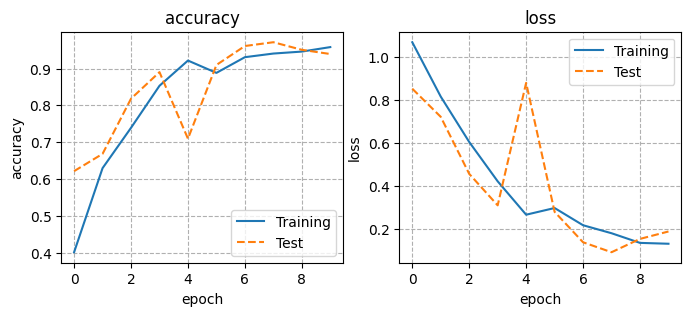

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

accuracy = history.history['acc']
val_accuracy = history.history['val_acc']

plt.figure(figsize=(8, 3))

plt.subplot(1, 2, 1)
plt.title('accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(accuracy, label='Training')
plt.plot(val_accuracy, label='Test', linestyle='--')
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1, 2, 2)
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(loss, label='Training')
plt.plot(val_loss, label='Test', linestyle='--')
plt.legend()
plt.grid(linestyle='--')

plt.show()

In [ ]:
def get_label(_label):
  labels = list(train_imgs.class_indices.keys())
  return (labels[_label],_label)

Saving paper-rps.png to paper-rps (4).png
1/1 [==============================] - 0s 22ms/step
{'paper': 0, 'rock': 1, 'scissors': 2}
('paper', 0)


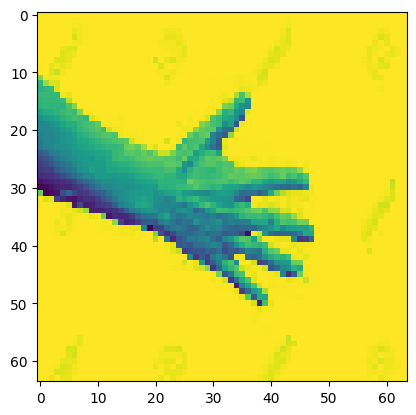

In [ ]:
uploaded = files.upload()

image = ''

for fn in uploaded.keys():
  path = fn
  img_inp = tf.keras.utils.load_img(path,target_size=IMAGE_SIZE,color_mode='grayscale')
  image = tf.keras.utils.img_to_array(img_inp)/255
  image = np.expand_dims(image, axis=0)

plt.imshow(image[0])
classes = model.predict(image, batch_size=10)
print(train_imgs.class_indices)
classes = get_label(np.argmax(classes))
print(classes)

1/1 [==============================] - 0s 79ms/step
{'paper': 0, 'rock': 1, 'scissors': 2}
('scissors', 2)


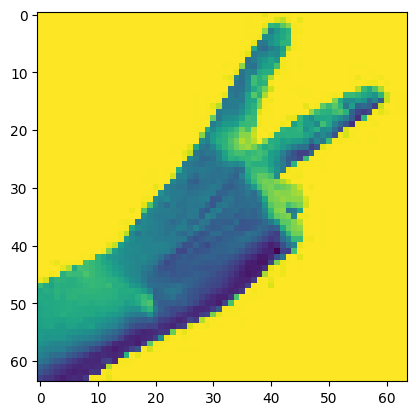

In [ ]:
img_inp = tf.keras.utils.load_img('scissorhand (1).jpeg',target_size=IMAGE_SIZE,color_mode='grayscale')
img_arr = tf.keras.utils.img_to_array(img_inp)/255
plt.imshow(img_arr)
img_arr = np.expand_dims(img_arr, axis=0)
classes = model.predict(img_arr)
print(train_imgs.class_indices)
classes = get_label(np.argmax(classes))
print(classes)